<a href="https://colab.research.google.com/github/Nadeem-Anwar/Nadeem-Anwar/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading and Writing** 400X BreaKHis_v1 dataset

In [ ]:
# To mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Folders to store benign and malignant images separately
import os

source = '/content/drive/MyDrive/BreaKHis_v1/histology_slides/breast'
destination = '/content/sample_data'

try:
  os.mkdir(destination + '/BreaKHis_v1')
  os.mkdir(destination + '/BreaKHis_v1/benign')         #all benign images
  os.mkdir(destination + '/BreaKHis_v1/malignant')      #all malignant images
except FileExistsError:
  print('Destination folders already exist')

Destination folders already exist


In [ ]:
import cv2
from matplotlib import pyplot

benignImg = []
benignName = []
malignantImg = []
malignantName = []
bCount = 0
mCount = 0
flag = 0

os.chdir(source)
for d in os.listdir():      #to access either of benign or malignant
  if d == 'benign':
    os.chdir(d)
    data = benignImg
    name = benignName
    flag = 0
  elif d == 'malignant':
    os.chdir(d)
    data = malignantImg
    name = malignantName
    flag = 1
  else:
    continue

  for dd in os.listdir():      #to access SOB folder 
    if dd == 'SOB':
      os.chdir(dd)
      os.getcwd()
    else:
      continue

    for typeDir in os.listdir(): #to access various type sample folder
      os.chdir(typeDir)

      for patientDir in os.listdir():#to access each of patient directories
        os.chdir(patientDir)
        
        for x in os.listdir():        #to access 400X images only
          if x == '400X':
            os.chdir(x)
            print('****** READING  ', os.getcwd() , '******')

            for f in os.listdir():      #to read each image
              file = os.getcwd() + '/' + f
              im = cv2.imread(file)
              data.append(im)
              name.append(f)
              if flag == 0:
                bCount = bCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/benign/' + f, im)
              elif flag == 1:
                mCount = mCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/malignant/' + f, im)

            os.chdir(os.pardir)
            break
          else:
            continue
          os.chdir(os.pardir)
          #break   #to be removed later, breaks are used to play with small sample
        os.chdir(os.pardir)
        #break   #*to be removed later
      os.chdir(os.pardir)
      #break   #to be removed later
    os.chdir(os.pardir)
  os.chdir(os.pardir)

print('Images found :\nbenign    = ' + str(bCount), '\nmalignant = ' + str(mCount))

****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11031/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-12312/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13412/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/400X ******
****** READING   /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-13993/400X ******
****** READING   /content/drive/MyDrive/B

# **Splitting** BreaKHis dataset and **Writing Splitted** datasets to Google Drive

In [ ]:
# To split data into train and test set
from sklearn.model_selection import train_test_split
Bx_train, Bx_test, Bname_train, Bname_test = train_test_split(benignImg, benignName, test_size = 0.2, random_state = 1)
Mx_train, Mx_test, Mname_train, Mname_test = train_test_split(malignantImg, malignantName, test_size = 0.2, random_state = 1)
print('Benign and Malignant data has been successfully splitted')

Benign and Malignant data has been successfully splitted


In [ ]:
# Folders for train test splitted data
try:
  os.mkdir(destination + '/BreaKHis_v1/train')
  os.mkdir(destination + '/BreaKHis_v1/train/benign')
  os.mkdir(destination + '/BreaKHis_v1/train/malignant')
  os.mkdir(destination + '/BreaKHis_v1/test')
  os.mkdir(destination + '/BreaKHis_v1/test/benign')
  os.mkdir(destination + '/BreaKHis_v1/test/malignant')
except FileExistsError:
  print('Destination folders for splitted dataset already exist')

In [ ]:
#To write/save images in given folder path
def imgSave(images, name, path):
  i = 0
  for img in images:
    pyplot.imsave(path + name[i], img, cmap='gray')
    i = i + 1
  return i

Bx_trainCount = imgSave(Bx_train, Bname_train, destination + '/BreaKHis_v1/train/benign/')
Mx_trainCount = imgSave(Mx_train, Mname_train, destination + '/BreaKHis_v1/train/malignant/')
Bx_testCount = imgSave(Bx_test, Bname_test, destination + '/BreaKHis_v1/test/benign/')
Mx_testCount = imgSave(Mx_test, Mname_test, destination + '/BreaKHis_v1/test/malignant/')

print('Following spliited data are written/save to drive:')
print('TRAIN set: benign = ' + str(Bx_trainCount), ', malignant = ' + str(Mx_trainCount))
print('TEST  set: benign = ' + str(Bx_testCount),  ', malignant = ' + str(Mx_testCount))

Following spliited data are written/save to drive:
TRAIN set: benign = 470 , malignant = 992
TEST  set: benign = 118 , malignant = 248


# **Preprocessing and Feature Extraction**

## *Preprocessing*

In [ ]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing             #from sklearn.preprocessing import binarize
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
from google.colab.patches import cv2_imshow

def binarise(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/#:~:text=otsu_thresholding.py%3A%20Applies%20Otsu%E2%80%99s%20thresholding%20method%20such%20that%20the,Otsu%E2%80%99s%20method%20will%20do%20that%20automatically%20for%20us.
  (T, thresh_hold) = cv2.threshold(imgg, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) #Grayscale image dynamically binarised using OTSU thresholding
  return thresh_hold

def hist_equalise(list, count, list_pre):
  for img in list:
    imgc = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    r_image, g_image, b_image = cv2.split(imgc)
    # RGB channels equalised separately
    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)

    imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val = None
    list_pre.append(binarise(imgc_eq))

Bx_train_pre = []
Bx_test_pre = []
Mx_train_pre = []
Mx_test_pre = []

hist_equalise(Bx_train, Bx_trainCount, Bx_train_pre)
hist_equalise(Bx_test,  Bx_testCount,  Bx_test_pre)
hist_equalise(Mx_train, Mx_trainCount, Mx_train_pre)
hist_equalise(Mx_test,  Mx_testCount,  Mx_test_pre)
print('Data preprocessed.')

Data preprocessed.


## ***COLOR FEATURES***

In [ ]:
# https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
# COLOR FEATURES
import numpy as np

def channel_valuer(dataset, channel, mode):
  channel_values = []             #[n] >>> n for file nummbers (similarly for each of following color modes)
  for i in range(len(dataset)):
    if mode != 0:
      data = cv2.cvtColor(dataset[i], mode)
    else:
      data = dataset[i]
    
    if channel == -1:
      value = np.mean(data)
    else:
      value = np.mean(data[:, :, channel])
    channel_values.append(value)
  return channel_values

def color_features_eachSet(dataset, color_mode, is_gray):
  color_dataset = []    #[m][n] >>> m = 0, 1 & 2 for blue, green & red channels respectively AND n for file nummbers (similarly for each of following color modes)
  if is_gray == True:
    color_dataset.append(channel_valuer(dataset, -1, color_mode))
  else:
    color_dataset.append(channel_valuer(dataset, 0, color_mode))
    color_dataset.append(channel_valuer(dataset, 1, color_mode))
    color_dataset.append(channel_valuer(dataset, 2, color_mode))
  return color_dataset
  
def color_features(color_mode, is_gray=False):
  color = []          # [l][m][n] >>> l = 0 ,1, 2 & 3 for each of the 4 sets, namely Bxtrain, Bxtest, Mxtrain & Mxtest,
                                    # m = 0, 1 & 2 for blue, green & red channels respectively AND n for file nummbers (similarly for each of following color modes)
  if is_gray:
    color.append(color_features_eachSet(Bx_train_pre, color_mode, is_gray))
    color.append(color_features_eachSet(Bx_test_pre, color_mode, is_gray))
    color.append(color_features_eachSet(Mx_train_pre, color_mode, is_gray))
    color.append(color_features_eachSet(Mx_test_pre, color_mode, is_gray))
  else:
    color.append(color_features_eachSet(Bx_train, color_mode, is_gray))
    color.append(color_features_eachSet(Bx_test, color_mode, is_gray))
    color.append(color_features_eachSet(Mx_train, color_mode, is_gray))
    color.append(color_features_eachSet(Mx_test, color_mode, is_gray))

  return color

print('Extracting COLOR  (BGR, HSV, LAB, YCrCb and Gray) features....')
#COLOR FEATURES       [l][m][n] >>> l = 0 ,1, 2 & 3 for each of the 4 sets, namely Bxtrain, Bxtest, Mxtrain & Mxtest,
                                  # m = 0, 1 & 2 for blue, green & red channels respectively AND n for file nummbers (similarly for each of following color modes)
bgr_feature = color_features(0)
hsv_feature = color_features(cv2.COLOR_BGR2HSV)
lab_feature = color_features(cv2.COLOR_BGR2LAB)
yCrCb_feature = color_features(cv2.COLOR_BGR2YCrCb)
gray_feature = color_features(0, True)              #GRAYSCALE FEATURE
print('COLOR features extracted.')

Extracting COLOR  (BGR, HSV, LAB, YCrCb and Gray) features....
COLOR features extracted.


## ***TEXTURE FEATURES***

In [ ]:
# https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
# TEXTURE FEATURE USING GLCM

#from math import fabs
import numpy as np
import skimage.feature as feature   # Find the GLCM

def textureFeature(imgList, contrast, dissimilarity, homogeneity, energy, correlation, ASM):
  for gray in imgList:
    # Param:   [# source image,   # List of pixel pair distance offsets - here 1 in each direction,   # List of pixel pair angles in radians]
    graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # Find the GLCM properties
    contrast.append(feature.greycoprops(graycom, 'contrast'))
    dissimilarity.append(feature.greycoprops(graycom, 'dissimilarity'))
    homogeneity.append(feature.greycoprops(graycom, 'homogeneity'))
    energy.append(feature.greycoprops(graycom, 'energy'))
    correlation.append(feature.greycoprops(graycom, 'correlation'))
    ASM.append(feature.greycoprops(graycom, 'ASM'))

# Texture FEATURE TO CSV FILE
print('Extracting TEXTURE (contrast, dissimilarity, homogeneity, energy, correlation,and ASM) features using GLCM....')
contrast_Bxtrain = []           #[m][0][n] >>> m = File Numbers and n = 0,1,2 & 3 respectively
dissimilarity_Bxtrain = []
homogeneity_Bxtrain = []
energy_Bxtrain = []
correlation_Bxtrain = []
ASM_Bxtrain = []
textureFeature(Bx_train_pre, contrast_Bxtrain, dissimilarity_Bxtrain, homogeneity_Bxtrain, energy_Bxtrain, correlation_Bxtrain, ASM_Bxtrain)

contrast_Bxtest = []
dissimilarity_Bxtest = []
homogeneity_Bxtest = []
energy_Bxtest = []
correlation_Bxtest = []
ASM_Bxtest = []
textureFeature(Bx_test_pre, contrast_Bxtest, dissimilarity_Bxtest, homogeneity_Bxtest, energy_Bxtest, correlation_Bxtest, ASM_Bxtest)

contrast_Mxtrain = []
dissimilarity_Mxtrain = []
homogeneity_Mxtrain = []
energy_Mxtrain = []
correlation_Mxtrain = []
ASM_Mxtrain = []
textureFeature(Mx_train_pre, contrast_Mxtrain, dissimilarity_Mxtrain, homogeneity_Mxtrain, energy_Mxtrain, correlation_Mxtrain, ASM_Mxtrain)

contrast_Mxtest = []
dissimilarity_Mxtest = []
homogeneity_Mxtest = []
energy_Mxtest = []
correlation_Mxtest = []
ASM_Mxtest = []
textureFeature(Mx_test_pre, contrast_Mxtest, dissimilarity_Mxtest, homogeneity_Mxtest, energy_Mxtest, correlation_Mxtest, ASM_Mxtest)
print('TEXTURE features extracted.')

Extracting TEXTURE (contrast, dissimilarity, homogeneity, energy, correlation,and ASM) features using GLCM....
TEXTURE features extracted.


In [ ]:
# https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
# TEXTURE FEATURE USING GLCM edit

#from math import fabs
import numpy as np
import skimage.feature as feature   # Find the GLCM

def texture_feature_eachset(dataset):
  contrast = []
  dissimilarity = []
  homogeneity = []
  energy = []
  correlation = []
  ASM = []

  for gray in dataset:
    # Param:   [# source image,   # List of pixel pair distance offsets - here 1 in each direction,   # List of pixel pair angles in radians]
    graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # Find the GLCM properties
    contrast.append(feature.greycoprops(graycom, 'contrast'))
    dissimilarity.append(feature.greycoprops(graycom, 'dissimilarity'))
    homogeneity.append(feature.greycoprops(graycom, 'homogeneity'))
    energy.append(feature.greycoprops(graycom, 'energy'))
    correlation.append(feature.greycoprops(graycom, 'correlation'))
    ASM.append(feature.greycoprops(graycom, 'ASM'))
  
  contrast_feature.append(contrast)
  dissimilarity_feature.append(dissimilarity)
  homogeneity_feature.append(homogeneity)
  energy_feature.append(energy)
  correlation_feature.append(correlation)
  ASM_feature.append(ASM)
  
def texture_feature():
  texture_feature_eachset(Bx_train_pre)
  texture_feature_eachset(Bx_test_pre)
  texture_feature_eachset(Mx_train_pre)
  texture_feature_eachset(Mx_test_pre)

# Texture FEATURE TO CSV FILE
print('Extracting TEXTURE (contrast, dissimilarity, homogeneity, energy, correlation,and ASM) features using GLCM....')
           #[l][m][0][n] >>> l = dataset, m = File Numbers and n = 0,1,2 & 3 respectively
contrast_feature = []
dissimilarity_feature = []
homogeneity_feature = []
energy_feature = []
correlation_feature = []
ASM_feature = []
texture_feature()
print('TEXTURE features extracted.')

Extracting TEXTURE (contrast, dissimilarity, homogeneity, energy, correlation,and ASM) features using GLCM....
TEXTURE features extracted.


## ***WRITING FEATURES*** TO CSV FILES

In [ ]:
# WRITING FEATURES TO CSV

import numpy as np
# Find the GLCM
import csv

def write_header(cw):   #Writing header of csv file
  cw.writerow(['b_bgr', 'g_bgr', 'r_bgr', 'h_hsv', 's_hsv', 'v_hsv',
                        'l_lab', 'a_lab', 'b_lab', 'y_yCrCb','cr_yCrCb','cb_yCrCb', 'gray',
                        'contrast0', 'contrast1', 'contrast2', 'contrast3',
                        'dissimilarity0', 'dissimilarity1', 'dissimilarity2', 'dissimilarity3',
                        'homogeneity0', 'homogeneity1', 'homogeneity2', 'homogeneity3',
                        'energy0', 'energy1', 'energy2', 'energy3',
                        'correlation0', 'correlation1', 'correlation2', 'correlation3',
                        'ASM0', 'ASM1', 'ASM', 'ASM3']
                        )

def write_features_Bxtrain(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_trainCount):
      csvwriter.writerow([bgr_feature[0][0][i], bgr_feature[0][1][i], bgr_feature[0][2][i],
                          hsv_feature[0][0][i], hsv_feature[0][1][i], hsv_feature[0][2][i],
                          lab_feature[0][0][i], lab_feature[0][1][i], lab_feature[0][2][i],
                          yCrCb_feature[0][0][i], yCrCb_feature[0][1][i], yCrCb_feature[0][2][i],
                          gray_feature[0][0][i],
                          contrast_Bxtrain[i][0][0], contrast_Bxtrain[i][0][1], contrast_Bxtrain[i][0][2], contrast_Bxtrain[i][0][3],
                          dissimilarity_Bxtrain[i][0][0], dissimilarity_Bxtrain[i][0][1], dissimilarity_Bxtrain[i][0][2], dissimilarity_Bxtrain[i][0][3],
                          homogeneity_Bxtrain[i][0][0], homogeneity_Bxtrain[i][0][1], homogeneity_Bxtrain[i][0][2], homogeneity_Bxtrain[i][0][3],
                          energy_Bxtrain[i][0][0], energy_Bxtrain[i][0][1], energy_Bxtrain[i][0][2], energy_Bxtrain[i][0][3],
                          correlation_Bxtrain[i][0][0], correlation_Bxtrain[i][0][1], correlation_Bxtrain[i][0][2], correlation_Bxtrain[i][0][3],
                          ASM_Bxtrain[i][0][0], ASM_Bxtrain[i][0][1], ASM_Bxtrain[i][0][2], ASM_Bxtrain[i][0][3]]
                        ) 

def write_features_Bxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_testCount):
      csvwriter.writerow([bgr_feature[1][0][i], bgr_feature[1][1][i], bgr_feature[1][2][i],
                          hsv_feature[1][0][i], hsv_feature[1][1][i], hsv_feature[1][2][i],
                          lab_feature[1][0][i], lab_feature[1][1][i], lab_feature[1][2][i],
                          yCrCb_feature[1][0][i], yCrCb_feature[1][1][i], yCrCb_feature[1][2][i],
                          gray_feature[1][0][i],
                          contrast_Bxtest[i][0][0], contrast_Bxtest[i][0][1], contrast_Bxtest[i][0][2], contrast_Bxtest[i][0][3],
                          dissimilarity_Bxtest[i][0][0], dissimilarity_Bxtest[i][0][1], dissimilarity_Bxtest[i][0][2], dissimilarity_Bxtest[i][0][3],
                          homogeneity_Bxtest[i][0][0], homogeneity_Bxtest[i][0][1], homogeneity_Bxtest[i][0][2], homogeneity_Bxtest[i][0][3],
                          energy_Bxtest[i][0][0], energy_Bxtest[i][0][1], energy_Bxtest[i][0][2], energy_Bxtest[i][0][3],
                          correlation_Bxtest[i][0][0], correlation_Bxtest[i][0][1], correlation_Bxtest[i][0][2], correlation_Bxtest[i][0][3],
                          ASM_Bxtest[i][0][0], ASM_Bxtest[i][0][1], ASM_Bxtest[i][0][2], ASM_Bxtest[i][0][3]]
                        ) 
def write_features_Mxtrain(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_trainCount):
      csvwriter.writerow([bgr_feature[2][0][i], bgr_feature[2][1][i], bgr_feature[2][2][i],
                          hsv_feature[2][0][i], hsv_feature[2][1][i], hsv_feature[2][2][i],
                          lab_feature[2][0][i], lab_feature[2][1][i], lab_feature[2][2][i],
                          yCrCb_feature[2][0][i], yCrCb_feature[2][1][i], yCrCb_feature[2][2][i],
                          gray_feature[2][0][i],
                          contrast_Mxtrain[i][0][0], contrast_Mxtrain[i][0][1], contrast_Mxtrain[i][0][2], contrast_Mxtrain[i][0][3],
                          dissimilarity_Mxtrain[i][0][0], dissimilarity_Mxtrain[i][0][1], dissimilarity_Mxtrain[i][0][2], dissimilarity_Mxtrain[i][0][3],
                          homogeneity_Mxtrain[i][0][0], homogeneity_Mxtrain[i][0][1], homogeneity_Mxtrain[i][0][2], homogeneity_Mxtrain[i][0][3],
                          energy_Mxtrain[i][0][0], energy_Mxtrain[i][0][1], energy_Mxtrain[i][0][2], energy_Mxtrain[i][0][3],
                          correlation_Mxtrain[i][0][0], correlation_Mxtrain[i][0][1], correlation_Mxtrain[i][0][2], correlation_Mxtrain[i][0][3],
                          ASM_Mxtrain[i][0][0], ASM_Mxtrain[i][0][1], ASM_Mxtrain[i][0][2], ASM_Mxtrain[i][0][3]]
                        ) 

def write_features_Mxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_testCount):
      csvwriter.writerow([bgr_feature[3][0][i], bgr_feature[3][1][i], bgr_feature[3][2][i],
                          hsv_feature[3][0][i], hsv_feature[3][1][i], hsv_feature[3][2][i],
                          lab_feature[3][0][i], lab_feature[3][1][i], lab_feature[3][2][i],
                          yCrCb_feature[3][0][i], yCrCb_feature[3][1][i], yCrCb_feature[3][2][i],
                          gray_feature[3][0][i],
                          contrast_Mxtest[i][0][0], contrast_Mxtest[i][0][1], contrast_Mxtest[i][0][2], contrast_Mxtest[i][0][3],
                          dissimilarity_Mxtest[i][0][0], dissimilarity_Mxtest[i][0][1], dissimilarity_Mxtest[i][0][2], dissimilarity_Mxtest[i][0][3],
                          homogeneity_Mxtest[i][0][0], homogeneity_Mxtest[i][0][1], homogeneity_Mxtest[i][0][2], homogeneity_Mxtest[i][0][3],
                          energy_Mxtest[i][0][0], energy_Mxtest[i][0][1], energy_Mxtest[i][0][2], energy_Mxtest[i][0][3],
                          correlation_Mxtest[i][0][0], correlation_Mxtest[i][0][1], correlation_Mxtest[i][0][2], correlation_Mxtest[i][0][3],
                          ASM_Mxtest[i][0][0], ASM_Mxtest[i][0][1], ASM_Mxtest[i][0][2], ASM_Mxtest[i][0][3]]
                        ) 

# WRITING FEATURE TO CSV FILE
write_features_Bxtrain('Bx_train.csv')
write_features_Bxtest('Bx_test.csv')
write_features_Mxtrain('Mx_train.csv')
write_features_Mxtest('Mx_test.csv')
print('Feature written/saved to csv files.')

Feature written/saved to csv files.


In [ ]:
# WRITING FEATURES TO CSV
#edit
import numpy as np
# Find the GLCM
import csv

def write_header(cw):   #Writing header of csv file
  cw.writerow(['b_bgr', 'g_bgr', 'r_bgr', 'h_hsv', 's_hsv', 'v_hsv',
                        'l_lab', 'a_lab', 'b_lab', 'y_yCrCb','cr_yCrCb','cb_yCrCb', 'gray',
                        'contrast0', 'contrast1', 'contrast2', 'contrast3',
                        'dissimilarity0', 'dissimilarity1', 'dissimilarity2', 'dissimilarity3',
                        'homogeneity0', 'homogeneity1', 'homogeneity2', 'homogeneity3',
                        'energy0', 'energy1', 'energy2', 'energy3',
                        'correlation0', 'correlation1', 'correlation2', 'correlation3',
                        'ASM0', 'ASM1', 'ASM', 'ASM3']
                        )

def write_features_Bxtrain(csvFile, set_id):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_trainCount):
      csvwriter.writerow([bgr_feature[0][0][i], bgr_feature[0][1][i], bgr_feature[0][2][i],
                          hsv_feature[0][0][i], hsv_feature[0][1][i], hsv_feature[0][2][i],
                          lab_feature[0][0][i], lab_feature[0][1][i], lab_feature[0][2][i],
                          yCrCb_feature[0][0][i], yCrCb_feature[0][1][i], yCrCb_feature[0][2][i],
                          gray_feature[0][0][i],
                          contrast_Bxtrain[i][0][0], contrast_Bxtrain[i][0][1], contrast_Bxtrain[i][0][2], contrast_Bxtrain[i][0][3],
                          dissimilarity_Bxtrain[i][0][0], dissimilarity_Bxtrain[i][0][1], dissimilarity_Bxtrain[i][0][2], dissimilarity_Bxtrain[i][0][3],
                          homogeneity_Bxtrain[i][0][0], homogeneity_Bxtrain[i][0][1], homogeneity_Bxtrain[i][0][2], homogeneity_Bxtrain[i][0][3],
                          energy_Bxtrain[i][0][0], energy_Bxtrain[i][0][1], energy_Bxtrain[i][0][2], energy_Bxtrain[i][0][3],
                          correlation_Bxtrain[i][0][0], correlation_Bxtrain[i][0][1], correlation_Bxtrain[i][0][2], correlation_Bxtrain[i][0][3],
                          ASM_Bxtrain[i][0][0], ASM_Bxtrain[i][0][1], ASM_Bxtrain[i][0][2], ASM_Bxtrain[i][0][3]]
                        ) 

def write_features_Bxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_testCount):
      csvwriter.writerow([bgr_feature[1][0][i], bgr_feature[1][1][i], bgr_feature[1][2][i],
                          hsv_feature[1][0][i], hsv_feature[1][1][i], hsv_feature[1][2][i],
                          lab_feature[1][0][i], lab_feature[1][1][i], lab_feature[1][2][i],
                          yCrCb_feature[1][0][i], yCrCb_feature[1][1][i], yCrCb_feature[1][2][i],
                          gray_feature[1][0][i],
                          contrast_Bxtest[i][0][0], contrast_Bxtest[i][0][1], contrast_Bxtest[i][0][2], contrast_Bxtest[i][0][3],
                          dissimilarity_Bxtest[i][0][0], dissimilarity_Bxtest[i][0][1], dissimilarity_Bxtest[i][0][2], dissimilarity_Bxtest[i][0][3],
                          homogeneity_Bxtest[i][0][0], homogeneity_Bxtest[i][0][1], homogeneity_Bxtest[i][0][2], homogeneity_Bxtest[i][0][3],
                          energy_Bxtest[i][0][0], energy_Bxtest[i][0][1], energy_Bxtest[i][0][2], energy_Bxtest[i][0][3],
                          correlation_Bxtest[i][0][0], correlation_Bxtest[i][0][1], correlation_Bxtest[i][0][2], correlation_Bxtest[i][0][3],
                          ASM_Bxtest[i][0][0], ASM_Bxtest[i][0][1], ASM_Bxtest[i][0][2], ASM_Bxtest[i][0][3]]
                        ) 
def write_features_Mxtrain(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_trainCount):
      csvwriter.writerow([bgr_feature[2][0][i], bgr_feature[2][1][i], bgr_feature[2][2][i],
                          hsv_feature[2][0][i], hsv_feature[2][1][i], hsv_feature[2][2][i],
                          lab_feature[2][0][i], lab_feature[2][1][i], lab_feature[2][2][i],
                          yCrCb_feature[2][0][i], yCrCb_feature[2][1][i], yCrCb_feature[2][2][i],
                          gray_feature[2][0][i],
                          contrast_Mxtrain[i][0][0], contrast_Mxtrain[i][0][1], contrast_Mxtrain[i][0][2], contrast_Mxtrain[i][0][3],
                          dissimilarity_Mxtrain[i][0][0], dissimilarity_Mxtrain[i][0][1], dissimilarity_Mxtrain[i][0][2], dissimilarity_Mxtrain[i][0][3],
                          homogeneity_Mxtrain[i][0][0], homogeneity_Mxtrain[i][0][1], homogeneity_Mxtrain[i][0][2], homogeneity_Mxtrain[i][0][3],
                          energy_Mxtrain[i][0][0], energy_Mxtrain[i][0][1], energy_Mxtrain[i][0][2], energy_Mxtrain[i][0][3],
                          correlation_Mxtrain[i][0][0], correlation_Mxtrain[i][0][1], correlation_Mxtrain[i][0][2], correlation_Mxtrain[i][0][3],
                          ASM_Mxtrain[i][0][0], ASM_Mxtrain[i][0][1], ASM_Mxtrain[i][0][2], ASM_Mxtrain[i][0][3]]
                        ) 

def write_features_Mxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_testCount):
      csvwriter.writerow([bgr_feature[3][0][i], bgr_feature[3][1][i], bgr_feature[3][2][i],
                          hsv_feature[3][0][i], hsv_feature[3][1][i], hsv_feature[3][2][i],
                          lab_feature[3][0][i], lab_feature[3][1][i], lab_feature[3][2][i],
                          yCrCb_feature[3][0][i], yCrCb_feature[3][1][i], yCrCb_feature[3][2][i],
                          gray_feature[3][0][i],
                          contrast_Mxtest[i][0][0], contrast_Mxtest[i][0][1], contrast_Mxtest[i][0][2], contrast_Mxtest[i][0][3],
                          dissimilarity_Mxtest[i][0][0], dissimilarity_Mxtest[i][0][1], dissimilarity_Mxtest[i][0][2], dissimilarity_Mxtest[i][0][3],
                          homogeneity_Mxtest[i][0][0], homogeneity_Mxtest[i][0][1], homogeneity_Mxtest[i][0][2], homogeneity_Mxtest[i][0][3],
                          energy_Mxtest[i][0][0], energy_Mxtest[i][0][1], energy_Mxtest[i][0][2], energy_Mxtest[i][0][3],
                          correlation_Mxtest[i][0][0], correlation_Mxtest[i][0][1], correlation_Mxtest[i][0][2], correlation_Mxtest[i][0][3],
                          ASM_Mxtest[i][0][0], ASM_Mxtest[i][0][1], ASM_Mxtest[i][0][2], ASM_Mxtest[i][0][3]]
                        ) 

# WRITING FEATURE TO CSV FILE
write_features_Bxtrain('Bx_train.csv', 0)
write_features_Bxtest('Bx_test.csv', 1)
write_features_Mxtrain('Mx_train.csv', 2)
write_features_Mxtest('Mx_test.csv', 3)
print('Feature written/saved to csv files.')

# **MACHINE LEARNING**

## ***READING FEATURES*** FROM CSV FILES

In [ ]:
import csv

def read_feature(csvfile):    #Read features from csv file
  list = []
  with open(destination + '/BreaKHis_v1/' + csvfile, 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
      list.append(row)
  return list

x_Btrain = read_feature('Bx_train.csv')
x_Btest = read_feature('Bx_test.csv')
x_Mtrain = read_feature('Mx_train.csv')
x_Mtest = read_feature('Mx_test.csv')

x_train = [*x_Btrain, *x_Mtrain]
x_test = [*x_Btest, *x_Mtest]
print('Read saved features from csv files.')

Read saved features from csv files.


In [ ]:
#Target/label set for each of train test set.
# 0 for Benign and 1 for Malignant
y_Btrain = [0 for i in range(Bx_trainCount)]
y_Btest = [0 for i in range(Bx_testCount)]

y_Mtrain = [1 for i in range(Mx_trainCount)]
y_Mtest = [1 for i in range(Mx_testCount)]

y_train = [*y_Btrain, *y_Mtrain]
y_test = [*y_Btest, *y_Mtest]

## Training and Testing **ML Models**

In [ ]:
#@title Scaling & Normalising
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
data_normalized_l1 = normalize(x_train, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)

[[ 1.61474626  1.33817929  1.02620045 ... -0.22083211 -0.27742443
  -0.24731733]
 [ 1.65374841  1.17682693  0.59031892 ...  0.34052437  0.25910863
   0.41632296]
 [-1.0561125  -0.23397331 -1.01498501 ...  2.1155609   2.27974823
   2.2688474 ]
 ...
 [ 2.51663816  1.99698426  1.46112134 ... -1.51752311 -1.51497756
  -1.44105242]
 [ 0.34818403 -1.51066887 -0.62755091 ...  1.32727688  1.34869473
   1.28941294]
 [ 0.05919129 -0.39601745  1.2146704  ...  1.39342038  1.23871969
   1.25742384]]

L1 normalized data:
 [[ 0.08140493  0.06746223  0.0517343  ... -0.01113291 -0.01398592
  -0.01246812]
 [ 0.06123342  0.04357443  0.02185777 ...  0.01260861  0.00959403
   0.01541521]
 [-0.03099654 -0.00686704 -0.02978947 ...  0.06209099  0.06690984
   0.0665899 ]
 ...
 [ 0.04281331  0.0339729   0.02485675 ... -0.02581626 -0.02577296
  -0.02451533]
 [ 0.01187143 -0.05150667 -0.02139652 ...  0.04525387  0.04598412
   0.04396289]
 [ 0.00169593 -0.01134654  0.03480228 ...  0.03992376  0.03549133
   0.03602

classifier is running....
[1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0]
Accuracy =  0.6967213114754098
Confusion Matrix:
 [[ 58  60]
 [ 51 197]]
Performance Evaluation:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       118
           1       0.77 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

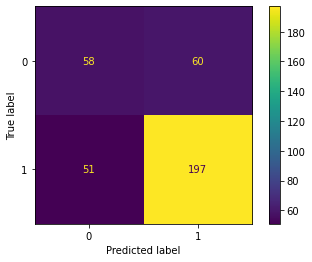

In [ ]:
#@title **KNN**
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

print('classifier is running....')
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(x_train, y_train)
y_pred = classifier_knn.predict(x_test)
print(y_pred)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Performance Evaluation:\n', metrics.classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(classifier_knn, x_test, y_test)

[1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy =  0.8633879781420765
Confusion Matrix:
 [[ 81  37]
 [ 13 235]]
Performance Evaluation:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76       118
           1       0.86      0.95      0.90       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


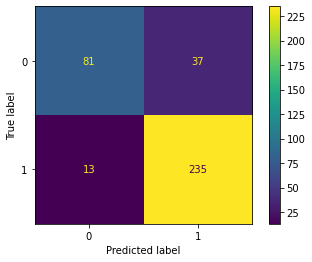

In [17]:
#@title **SVM**
from sklearn.svm import SVC
from sklearn import metrics

classifier_svm = SVC(kernel = 'linear')
#classifier_svm = SVC(kernel = 'poly', degree = 3)
#classifier_svm = SVC(kernel = 'rbf')  #Gaussian kernel
#classifier_svm = SVC(kernel = 'sigmoid')  #Sigmoid kernel
#classifier_svm = SVC(kernel = 'linear', random_state=10, max_iter = 5)
classifier_svm.fit(x_train, y_train)
y_pred = classifier_svm.predict(x_test)
print(y_pred)

# Evaluation of classifier_svm performance
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Performance Evaluation:\n', metrics.classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(classifier_svm, x_test, y_test)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy =  0.8797814207650273
Confusion Matrix:
 [[ 85  33]
 [ 11 237]]
Performance Evaluation:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79       118
           1       0.88      0.96      0.92       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


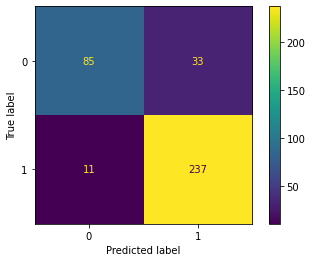

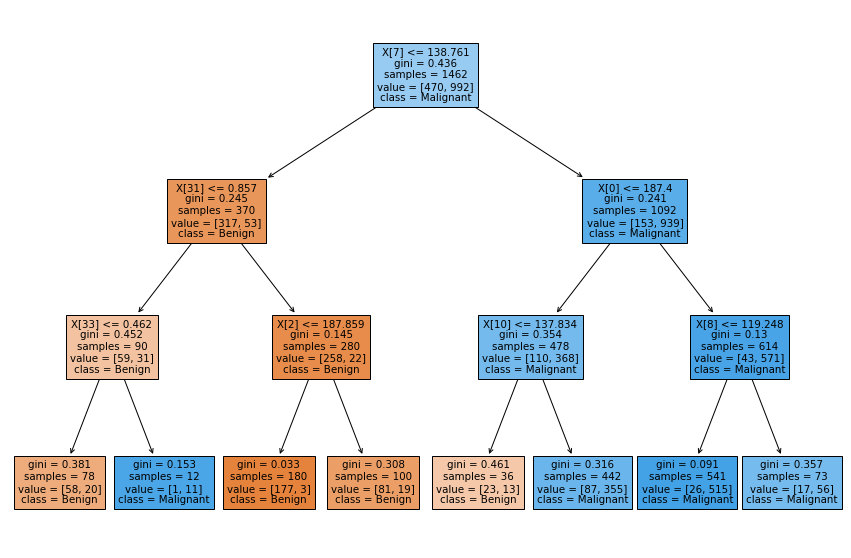

In [18]:
#@title **Decision Tree**
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree
import matplotlib.pyplot as plt

#classifier_dt = DecisionTreeClassifier()
#classifier_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
classifier_dt.fit(x_train, y_train)
y_pred = classifier_dt.predict(x_test)
print(y_pred)

# Evaluation of classifier_svm performance
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Performance Evaluation:\n', metrics.classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(classifier_dt, x_test, y_test)

#Tree representation
print(tree.export_text(classifier_dt))
#Visualising the graph withoit using graphviz
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(decision_tree=classifier_dt, class_names = ['Benign', 'Malignant'], filled = True) #features_name=x_train.columns)
fig.savefig('/content/sample_data/BreaKHis_v1/DecisionTree.png')

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
Accuracy =  0.7978142076502732
Confusion Matrix:
 [[ 94  24]
 [ 50 198]]
Performance Evaluation:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       118
           1       0.89      0.80      0.84       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

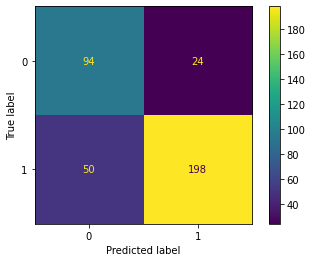

In [19]:
#@title **Gausian Naive Bayes**
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
classifier_gnb = GaussianNB()
classifier_gnb.fit(x_train, y_train)
y_pred = classifier_gnb.predict(x_test)
print(y_pred)

# Evaluation of classifier_svm performance
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Performance Evaluation:\n', metrics.classification_report(y_test, y_pred))
metrics.plot_confusion_matrix(classifier_gnb, x_test, y_test)

In [ ]:
#@title **MLP**
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
# let's fit the training data to our model
mlp.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
predictions_train = mlp.predict(x_train)
print(accuracy_score(predictions_train, y_train))
predictions_test = mlp.predict(x_test)
print(accuracy_score(predictions_test, y_test))
from sklearn.metrics import classification_report
print(classification_report(predictions_test, y_test))

0.9777777777777777
0.9117647058823529
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.88      0.93      0.90        15

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



# Practice Code

In [ ]:
from scipy.misc import imread, imsave
from google.colab.patches import cv2_imshow
f = '/content/sample_data/BreaKHis_v1/benign/SOB_B_A-14-22549AB-400-001.png'
img = imread(f, mode='L')
t=96
#print(img)
binarized = 1.0*(img>t)
print(binarized)
cv2_imshow(binarized)
imsave(destination + '/BreaKHis_v1/bin.png', binarized)

In [ ]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing             #from sklearn.preprocessing import binarize
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
#version x

def binariser(r):
  #cv2_imshow(r)
  r = cv2.cvtColor(r, cv2.COLOR_RGB2GRAY)
  #cv2_imshow(r)
  t = 96
  for i in range(r.shape[0]):
    for j in range(r.shape[1]):
      if r[i][j] <= t:
        r[i][j] = 0
      elif r[i][j] > t:
        r[i][j] = 255
  cv2_imshow(r)
  return r

def binarise(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  (T, thresh_hold) = cv2.threshold(imgg, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
  return thresh_hold

def hist_equalise(list, count, list_pre):
  x_list_eq = []
  for img in list:
    #cv2_imshow(img)
    #hist(img)
    imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r_image, g_image, b_image = cv2.split(imgc)

    r_image_eq = cv2.equalizeHist(r_image)
    g_image_eq = cv2.equalizeHist(g_image)
    b_image_eq = cv2.equalizeHist(b_image)

    imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val = None
    #print(imgc_eq)
    list_pre.append(binarise(imgc_eq))
    break

Bx_train_pre = []
Bx_test_pre = []
Mx_train_pre = []
Mx_test_pre = []

hist_equalise(Bx_train, Bx_trainCount, Bx_train_pre)
hist_equalise(Bx_test,  Bx_testCount,  Bx_test_pre)
hist_equalise(Mx_train, Mx_trainCount, Mx_train_pre)
hist_equalise(Mx_test,  Mx_testCount,  Mx_test_pre)

In [ ]:
# https://www.codespeedy.com/splitting-rgb-and-hsv-values-in-an-image-using-opencv-python/
# COLOR FEATURES

import numpy as np
import cv2

def average(channel):
  sum = 0
  for c in channel:
    for x in c: 
      sum = sum + x
  avg = sum/(700*460)
  return avg

color = Mx_test[0]
b,g,r = cv2.split(color)
bAvg = average(b)
gAvg = average(g)
rAvg = average(r)

print("RGB Channels= \t", bAvg, gAvg, rAvg)
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
hAvg = average(h)
sAvg = average(s)
vAvg = average(v)
print("HSV Channels= \t", hAvg, sAvg, vAvg)
#cv2_imshow(np.concatenate((h,s,v),axis=1))

lab = cv2.cvtColor(color, cv2.COLOR_BGR2LAB)
l,a,b = cv2.split(lab)
lAvg = average(l)
aAvg = average(a)
bAvg = average(b)
print("LAB Channels= \t", lAvg, aAvg, bAvg)
#cv2_imshow(np.concatenate((l,a,b),axis=1))

yCrCb = cv2.cvtColor(color, cv2.COLOR_BGR2YCrCb)
y,cr,cb = cv2.split(yCrCb)
yAvg = average(y)
crAvg = average(cr)
cbAvg = average(cb)
print("YCrCb Channels= ", yAvg, crAvg, cbAvg)
#cv2_imshow(np.concatenate((y,cr,cb),axis=1))

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
grAvg = average(gray)
print("Gray Channel = \t", grAvg)

RGB Channels= 	 187.2140559006211 116.85539440993789 167.01618322981366
HSV Channels= 	 143.1315807453416 100.87185403726708 188.1119440993789
LAB Channels= 	 144.2352453416149 160.6442204968944 98.58236645962732
YCrCb Channels=  139.88371739130434 147.38017080745342 154.70837267080745
Gray Channel = 	 165.11723291925466


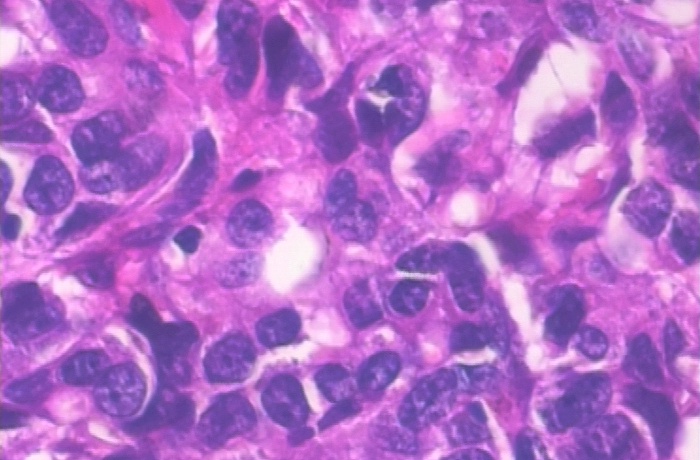

(460, 700, 3)
[[158 169 180 ... 224 224 214]
 [162 172 181 ... 225 221 218]
 [166 174 186 ... 225 219 212]
 ...
 [178 188 197 ... 241 236 242]
 [175 189 198 ... 240 239 245]
 [163 177 187 ... 239 236 243]] [[ 78  75  77 ... 164 163 157]
 [ 82  78  78 ... 164 160 161]
 [ 85  80  83 ... 164 158 155]
 ...
 [101  96  95 ... 227 223 228]
 [ 96  96  96 ... 226 226 231]
 [ 84  85  86 ... 225 223 229]] [[145 152 162 ... 225 221 208]
 [149 155 163 ... 228 218 212]
 [154 157 168 ... 228 216 206]
 ...
 [168 167 172 ... 245 237 239]
 [163 163 168 ... 244 240 243]
 [147 150 154 ... 243 237 241]]


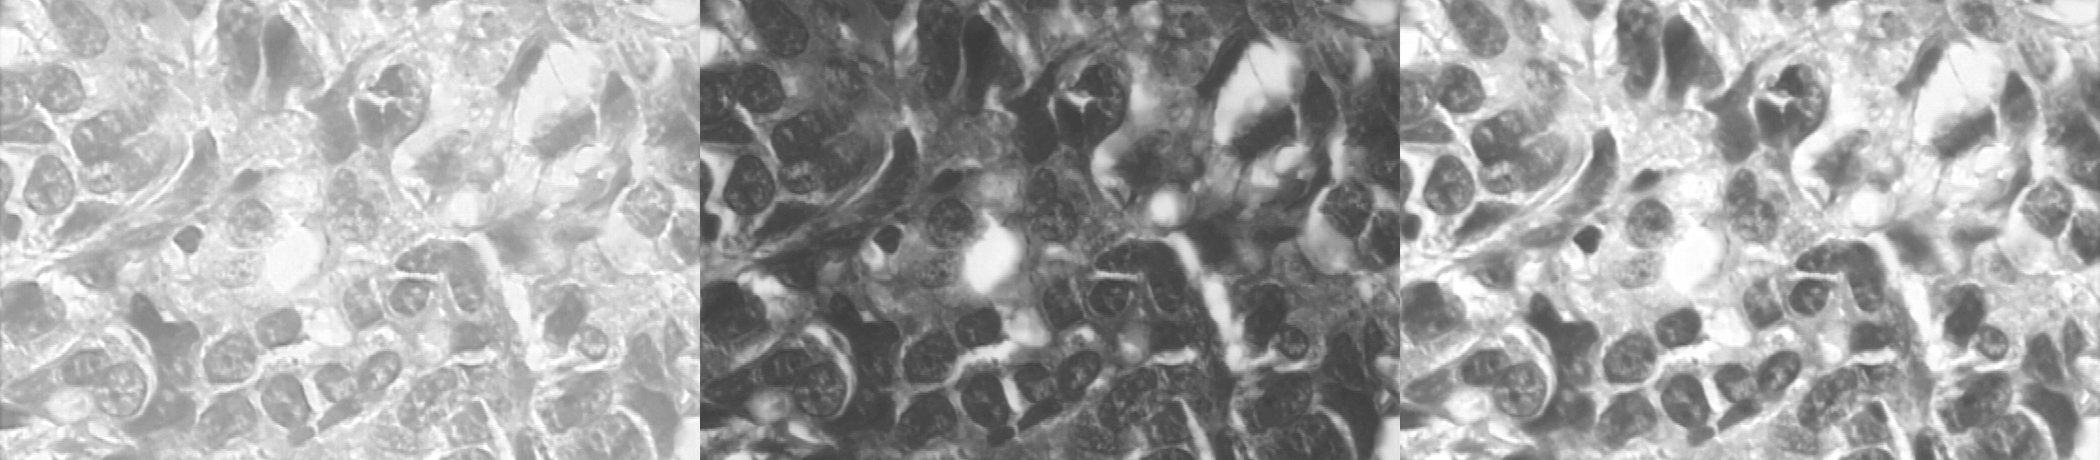

[[145 145 145 ... 150 148 147]
 [145 145 145 ... 151 148 147]
 [146 145 145 ... 151 148 147]
 ...
 [146 143 143 ... 157 152 144]
 [145 142 141 ... 157 152 146]
 [144 141 140 ... 157 152 146]] [[129 142 146 ...  69  69  68]
 [126 139 145 ...  72  70  67]
 [124 138 141 ...  72  71  69]
 ...
 [110 125 132 ...  19  15  15]
 [115 125 131 ...  19  15  15]
 [124 133 138 ...  19  15  15]] [[158 169 180 ... 225 224 214]
 [162 172 181 ... 228 221 218]
 [166 174 186 ... 228 219 212]
 ...
 [178 188 197 ... 245 237 242]
 [175 189 198 ... 244 240 245]
 [163 177 187 ... 243 237 243]]


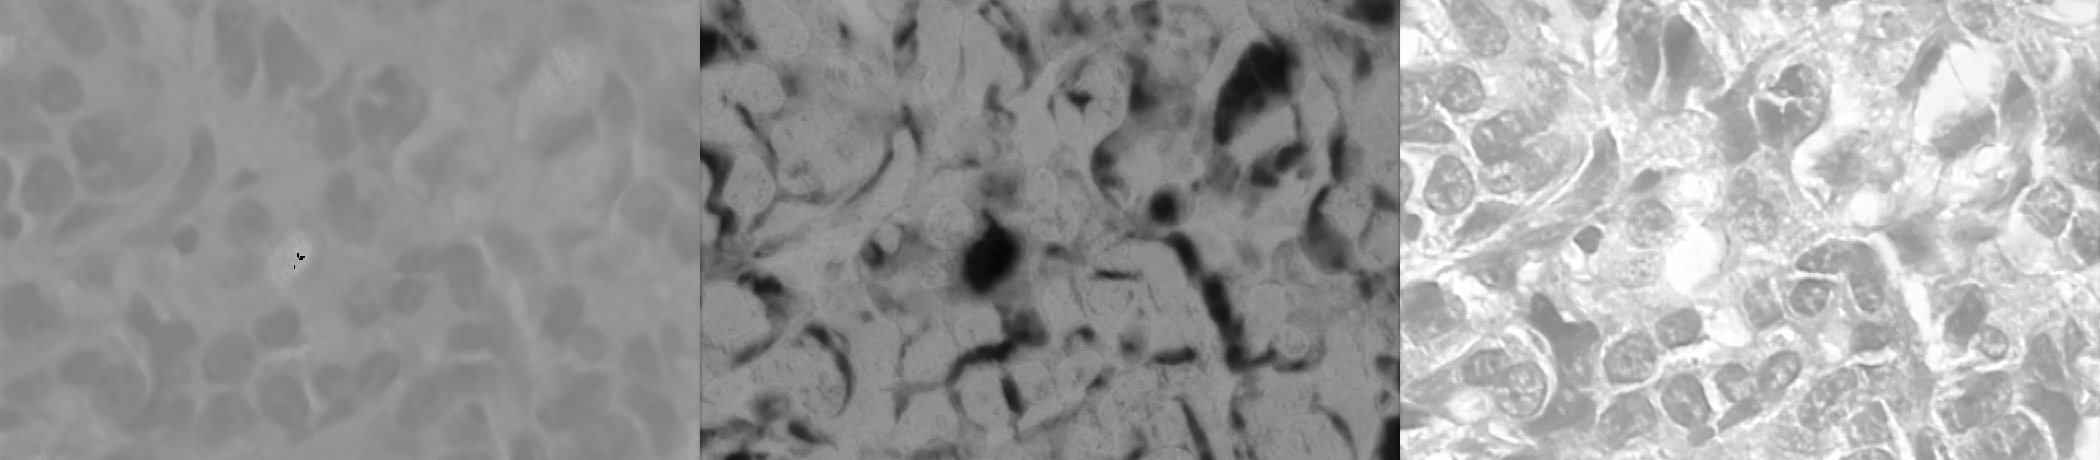

In [ ]:
# https://www.codespeedy.com/splitting-rgb-and-hsv-values-in-an-image-using-opencv-python/

import numpy as np
import cv2
#color = cv2.imread("butterfly.jpg", 1)
color = Mx_train[10]
cv2_imshow(color)
#cv2.moveWindow("Image",0,0)
print(color.shape)
height,width,channels = color.shape
b,g,r = cv2.split(color)
print(b,g,r)
rgb_split = np.empty([height,width*3,3],'uint8')
rgb_split[:, 0:width] = cv2.merge([b,b,b])
rgb_split[:, width:width*2] = cv2.merge([g,g,g])
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r])
cv2_imshow(rgb_split)
#cv2.moveWindow("Channels",0,height)
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
print(h,s,v)
hsv_split = np.concatenate((h,s,v),axis=1)
cv2_imshow(hsv_split)

In [ ]:
# https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
# COLOR FEATURES
import numpy as np

def channel_valuer(dataset, channel, mode):
  channel_values = []
  for i in range(len(dataset)):
    if mode != 0:
      data = cv2.cvtColor(dataset[i], mode)
    else:
      data = dataset[i]
    
    if channel == -1:
      value = np.mean(data)
    else:
      value = np.mean(data[:, :, channel])
    channel_values.append(value)
  return channel_values

#BGR COLOR FEATURE
print('Extracting COLOR  (BGR, HSV, LAB, YCrCb and Gray) features....')
bgr_Bxtrain = []    #[m][n] >>> m = 0, 1 & 2 for blue, green & red respectively AND n for file nummbers (similarly for each of following color modes)
bgr_Bxtest = []
bgr_Mxtrain = []
bgr_Mxtest = []
bgr_Bxtrain.append(channel_valuer(Bx_train, 0, 0))
bgr_Bxtrain.append(channel_valuer(Bx_train, 1, 0))
bgr_Bxtrain.append(channel_valuer(Bx_train, 2, 0))
bgr_Bxtest.append(channel_valuer(Bx_test, 0, 0))
bgr_Bxtest.append(channel_valuer(Bx_test, 1, 0))
bgr_Bxtest.append(channel_valuer(Bx_test, 2, 0))
bgr_Mxtrain.append(channel_valuer(Mx_train, 0, 0))
bgr_Mxtrain.append(channel_valuer(Mx_train, 1, 0))
bgr_Mxtrain.append(channel_valuer(Mx_train, 2, 0))
bgr_Mxtest.append(channel_valuer(Mx_test, 0, 0))
bgr_Mxtest.append(channel_valuer(Mx_test, 1, 0))
bgr_Mxtest.append(channel_valuer(Mx_test, 2, 0))

#HSV COLOR FEATURE
hsv_Bxtrain = []
hsv_Bxtest = []
hsv_Mxtrain = []
hsv_Mxtest = []
hsv_Bxtrain.append(channel_valuer(Bx_train, 0, cv2.COLOR_BGR2HSV))
hsv_Bxtrain.append(channel_valuer(Bx_train, 1, cv2.COLOR_BGR2HSV))
hsv_Bxtrain.append(channel_valuer(Bx_train, 2, cv2.COLOR_BGR2HSV))
hsv_Bxtest.append(channel_valuer(Bx_test, 0, cv2.COLOR_BGR2HSV))
hsv_Bxtest.append(channel_valuer(Bx_test, 1, cv2.COLOR_BGR2HSV))
hsv_Bxtest.append(channel_valuer(Bx_test, 2, cv2.COLOR_BGR2HSV))
hsv_Mxtrain.append(channel_valuer(Mx_train, 0, cv2.COLOR_BGR2HSV))
hsv_Mxtrain.append(channel_valuer(Mx_train, 1, cv2.COLOR_BGR2HSV))
hsv_Mxtrain.append(channel_valuer(Mx_train, 2, cv2.COLOR_BGR2HSV))
hsv_Mxtest.append(channel_valuer(Mx_test, 0, cv2.COLOR_BGR2HSV))
hsv_Mxtest.append(channel_valuer(Mx_test, 1, cv2.COLOR_BGR2HSV))
hsv_Mxtest.append(channel_valuer(Mx_test, 2, cv2.COLOR_BGR2HSV))

#LAB COLOR FEATURE
lab_Bxtrain = []
lab_Bxtest = []
lab_Mxtrain = []
lab_Mxtest = []
lab_Bxtrain.append(channel_valuer(Bx_train, 0, cv2.COLOR_BGR2LAB))
lab_Bxtrain.append(channel_valuer(Bx_train, 1, cv2.COLOR_BGR2LAB))
lab_Bxtrain.append(channel_valuer(Bx_train, 2, cv2.COLOR_BGR2LAB))
lab_Bxtest.append(channel_valuer(Bx_test, 0, cv2.COLOR_BGR2LAB))
lab_Bxtest.append(channel_valuer(Bx_test, 1, cv2.COLOR_BGR2LAB))
lab_Bxtest.append(channel_valuer(Bx_test, 2, cv2.COLOR_BGR2LAB))
lab_Mxtrain.append(channel_valuer(Mx_train, 0, cv2.COLOR_BGR2LAB))
lab_Mxtrain.append(channel_valuer(Mx_train, 1, cv2.COLOR_BGR2LAB))
lab_Mxtrain.append(channel_valuer(Mx_train, 2, cv2.COLOR_BGR2LAB))
lab_Mxtest.append(channel_valuer(Mx_test, 0, cv2.COLOR_BGR2LAB))
lab_Mxtest.append(channel_valuer(Mx_test, 1, cv2.COLOR_BGR2LAB))
lab_Mxtest.append(channel_valuer(Mx_test, 2, cv2.COLOR_BGR2LAB))

#YCrCb COLOR FEATURE
yCrCb_Bxtrain = []
yCrCb_Bxtest = []
yCrCb_Mxtrain = []
yCrCb_Mxtest = []
yCrCb_Bxtrain.append(channel_valuer(Bx_train, 0, cv2.COLOR_BGR2YCrCb))
yCrCb_Bxtrain.append(channel_valuer(Bx_train, 1, cv2.COLOR_BGR2YCrCb))
yCrCb_Bxtrain.append(channel_valuer(Bx_train, 2, cv2.COLOR_BGR2YCrCb))
yCrCb_Bxtest.append(channel_valuer(Bx_test, 0, cv2.COLOR_BGR2YCrCb))
yCrCb_Bxtest.append(channel_valuer(Bx_test, 1, cv2.COLOR_BGR2YCrCb))
yCrCb_Bxtest.append(channel_valuer(Bx_test, 2, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtrain.append(channel_valuer(Mx_train, 0, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtrain.append(channel_valuer(Mx_train, 1, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtrain.append(channel_valuer(Mx_train, 2, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtest.append(channel_valuer(Mx_test, 0, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtest.append(channel_valuer(Mx_test, 1, cv2.COLOR_BGR2YCrCb))
yCrCb_Mxtest.append(channel_valuer(Mx_test, 2, cv2.COLOR_BGR2YCrCb))

#GRAYSCALE FEATURE
gray_Bxtrain = []
gray_Bxtest = []
gray_Mxtrain = []
gray_Mxtest = []
gray_Bxtrain.append(channel_valuer(Bx_train_pre, -1, 0))
gray_Bxtest.append(channel_valuer(Bx_test_pre, -1, 0))
gray_Mxtrain.append(channel_valuer(Mx_train_pre, -1, 0))
gray_Mxtest.append(channel_valuer(Mx_test_pre, -1, 0))
print('COLOR features extracted.')

Extracting COLOR  (BGR, HSV, LAB, YCrCb and Gray) features....
COLOR features extracted.


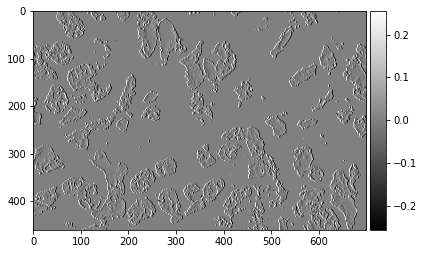

In [ ]:
#importing the required libraries
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

#reading the image 
#image = imread('puppy.jpeg',as_gray=True)
image = Mx_train_pre[10]

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

In [ ]:
# TEXTURE FEATURE USING GLCM
import cv2
import numpy as np

#image_spot = cv2.imread(image_file)
#gray = cv2.cvtColor(image_spot, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]

# Find the GLCM
import skimage.feature as feature

# Param:
# source image
# List of pixel pair distance offsets - here 1 in each direction
# List of pixel pair angles in radians
graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

# Find the GLCM properties
contrast = feature.greycoprops(graycom, 'contrast')
dissimilarity = feature.greycoprops(graycom, 'dissimilarity')
homogeneity = feature.greycoprops(graycom, 'homogeneity')
energy = feature.greycoprops(graycom, 'energy')
correlation = feature.greycoprops(graycom, 'correlation')
ASM = feature.greycoprops(graycom, 'ASM')

print("Contrast: {}".format(contrast))
print("Dissimilarity: {}".format(dissimilarity))
print("Homogeneity: {}".format(homogeneity))
print("Energy: {}".format(energy))
print("Correlation: {}".format(correlation))
print("ASM: {}".format(ASM))

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM), axis=0)
features


Contrast: [[154.32583815 195.67699265 160.67779023 192.79370779]]
Dissimilarity: [[3.88473596 4.86461518 4.07825708 4.78147743]]
Homogeneity: [[0.77638199 0.75660537 0.77127179 0.75927347]]
Energy: [[0.73102475 0.72353683 0.72943347 0.72362694]]
Correlation: [[0.74908963 0.68190553 0.73885188 0.68658882]]
ASM: [[0.53439719 0.52350554 0.53207319 0.52363595]]


array([[154.32583815, 195.67699265, 160.67779023, 192.79370779],
       [  3.88473596,   4.86461518,   4.07825708,   4.78147743],
       [  0.77638199,   0.75660537,   0.77127179,   0.75927347],
       [  0.73102475,   0.72353683,   0.72943347,   0.72362694],
       [  0.74908963,   0.68190553,   0.73885188,   0.68658882],
       [  0.53439719,   0.52350554,   0.53207319,   0.52363595]])

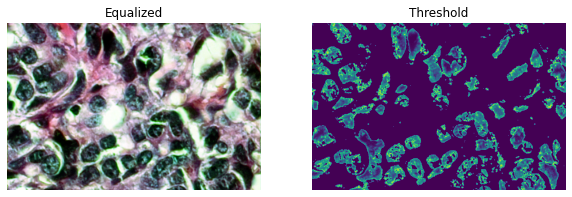

In [ ]:
# https://www.charterglobal.com/what-is-image-binarization-in-ai/
ret, thresh_hold = cv2.threshold(imgg, 65, 255, cv2.THRESH_TOZERO_INV)
fig = pyplot.figure(figsize=(10, 20))

'''ax1 = fig.add_subplot(2, 3, 1)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 3, 2)
ax2.axis("off")
ax2.title.set_text("BGR2RGB")
'''
ax3 = fig.add_subplot(2, 2, 3)
ax3.axis("off")
ax3.title.set_text("Equalized")

ax4 = fig.add_subplot(2, 2, 4)
ax4.axis("off")
ax4.title.set_text("Threshold")

#ax1.imshow(img, cmap=cmap_val)
#ax2.imshow(imgg, cmap=cmap_val)
ax3.imshow(imgc_eq, cmap=cmap_val)
ax4.imshow(thresh_hold, cmap=cmap_val)
pyplot.imsave(destination + '/BreaKHis_v1/demo.png', thresh_hold)

In [ ]:
# WRITING FEATURES TO CSV

import numpy as np
# Find the GLCM
import csv

def write_header(cw):   #Writing header of csv file
  cw.writerow(['b_bgr', 'g_bgr', 'r_bgr', 'h_hsv', 's_hsv', 'v_hsv',
                        'l_lab', 'a_lab', 'b_lab', 'y_yCrCb','cr_yCrCb','cb_yCrCb', 'gray',
                        'contrast0', 'contrast1', 'contrast2', 'contrast3',
                        'dissimilarity0', 'dissimilarity1', 'dissimilarity2', 'dissimilarity3',
                        'homogeneity0', 'homogeneity1', 'homogeneity2', 'homogeneity3',
                        'energy0', 'energy1', 'energy2', 'energy3',
                        'correlation0', 'correlation1', 'correlation2', 'correlation3',
                        'ASM0', 'ASM1', 'ASM', 'ASM3']
                        )

def write_features_Bxtrain(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_trainCount):
      csvwriter.writerow([bgr_Bxtrain[0][i], bgr_Bxtrain[1][i], bgr_Bxtrain[2][i],
                          hsv_Bxtrain[0][i], hsv_Bxtrain[1][i], hsv_Bxtrain[2][i],
                          lab_Bxtrain[0][i], lab_Bxtrain[1][i], lab_Bxtrain[2][i],
                          yCrCb_Bxtrain[0][i], yCrCb_Bxtrain[1][i], yCrCb_Bxtrain[2][i],
                          gray_Bxtrain[0][i],
                          contrast_Bxtrain[i][0][0], contrast_Bxtrain[i][0][1], contrast_Bxtrain[i][0][2], contrast_Bxtrain[i][0][3],
                          dissimilarity_Bxtrain[i][0][0], dissimilarity_Bxtrain[i][0][1], dissimilarity_Bxtrain[i][0][2], dissimilarity_Bxtrain[i][0][3],
                          homogeneity_Bxtrain[i][0][0], homogeneity_Bxtrain[i][0][1], homogeneity_Bxtrain[i][0][2], homogeneity_Bxtrain[i][0][3],
                          energy_Bxtrain[i][0][0], energy_Bxtrain[i][0][1], energy_Bxtrain[i][0][2], energy_Bxtrain[i][0][3],
                          correlation_Bxtrain[i][0][0], correlation_Bxtrain[i][0][1], correlation_Bxtrain[i][0][2], correlation_Bxtrain[i][0][3],
                          ASM_Bxtrain[i][0][0], ASM_Bxtrain[i][0][1], ASM_Bxtrain[i][0][2], ASM_Bxtrain[i][0][3]]
                        ) 

def write_features_Bxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Bx_testCount):
      csvwriter.writerow([bgr_Bxtest[0][i], bgr_Bxtest[1][i], bgr_Bxtest[2][i],
                          hsv_Bxtest[0][i], hsv_Bxtest[1][i], hsv_Bxtest[2][i],
                          lab_Bxtest[0][i], lab_Bxtest[1][i], lab_Bxtest[2][i],
                          yCrCb_Bxtest[0][i], yCrCb_Bxtest[1][i], yCrCb_Bxtest[2][i],
                          gray_Bxtest[0][i],
                          contrast_Bxtest[i][0][0], contrast_Bxtest[i][0][1], contrast_Bxtest[i][0][2], contrast_Bxtest[i][0][3],
                          dissimilarity_Bxtest[i][0][0], dissimilarity_Bxtest[i][0][1], dissimilarity_Bxtest[i][0][2], dissimilarity_Bxtest[i][0][3],
                          homogeneity_Bxtest[i][0][0], homogeneity_Bxtest[i][0][1], homogeneity_Bxtest[i][0][2], homogeneity_Bxtest[i][0][3],
                          energy_Bxtest[i][0][0], energy_Bxtest[i][0][1], energy_Bxtest[i][0][2], energy_Bxtest[i][0][3],
                          correlation_Bxtest[i][0][0], correlation_Bxtest[i][0][1], correlation_Bxtest[i][0][2], correlation_Bxtest[i][0][3],
                          ASM_Bxtest[i][0][0], ASM_Bxtest[i][0][1], ASM_Bxtest[i][0][2], ASM_Bxtest[i][0][3]]
                        ) 
def write_features_Mxtrain(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_trainCount):
      csvwriter.writerow([bgr_Mxtrain[0][i], bgr_Mxtrain[1][i], bgr_Mxtrain[2][i],
                          hsv_Mxtrain[0][i], hsv_Mxtrain[1][i], hsv_Mxtrain[2][i],
                          lab_Mxtrain[0][i], lab_Mxtrain[1][i], lab_Mxtrain[2][i],
                          yCrCb_Mxtrain[0][i], yCrCb_Mxtrain[1][i], yCrCb_Mxtrain[2][i],
                          gray_Mxtrain[0][i],
                          contrast_Mxtrain[i][0][0], contrast_Mxtrain[i][0][1], contrast_Mxtrain[i][0][2], contrast_Mxtrain[i][0][3],
                          dissimilarity_Mxtrain[i][0][0], dissimilarity_Mxtrain[i][0][1], dissimilarity_Mxtrain[i][0][2], dissimilarity_Mxtrain[i][0][3],
                          homogeneity_Mxtrain[i][0][0], homogeneity_Mxtrain[i][0][1], homogeneity_Mxtrain[i][0][2], homogeneity_Mxtrain[i][0][3],
                          energy_Mxtrain[i][0][0], energy_Mxtrain[i][0][1], energy_Mxtrain[i][0][2], energy_Mxtrain[i][0][3],
                          correlation_Mxtrain[i][0][0], correlation_Mxtrain[i][0][1], correlation_Mxtrain[i][0][2], correlation_Mxtrain[i][0][3],
                          ASM_Mxtrain[i][0][0], ASM_Mxtrain[i][0][1], ASM_Mxtrain[i][0][2], ASM_Mxtrain[i][0][3]]
                        ) 

def write_features_Mxtest(csvFile):
  with open(destination + '/BreaKHis_v1/' + csvFile, 'w') as f:
    csvwriter = csv.writer(f)
    write_header(csvwriter)
    for i in range(Mx_testCount):
      csvwriter.writerow([bgr_Mxtest[0][i], bgr_Mxtest[1][i], bgr_Mxtest[2][i],
                          hsv_Mxtest[0][i], hsv_Mxtest[1][i], hsv_Mxtest[2][i],
                          lab_Mxtest[0][i], lab_Mxtest[1][i], lab_Mxtest[2][i],
                          yCrCb_Mxtest[0][i], yCrCb_Mxtest[1][i], yCrCb_Mxtest[2][i],
                          gray_Mxtest[0][i],
                          contrast_Mxtest[i][0][0], contrast_Mxtest[i][0][1], contrast_Mxtest[i][0][2], contrast_Mxtest[i][0][3],
                          dissimilarity_Mxtest[i][0][0], dissimilarity_Mxtest[i][0][1], dissimilarity_Mxtest[i][0][2], dissimilarity_Mxtest[i][0][3],
                          homogeneity_Mxtest[i][0][0], homogeneity_Mxtest[i][0][1], homogeneity_Mxtest[i][0][2], homogeneity_Mxtest[i][0][3],
                          energy_Mxtest[i][0][0], energy_Mxtest[i][0][1], energy_Mxtest[i][0][2], energy_Mxtest[i][0][3],
                          correlation_Mxtest[i][0][0], correlation_Mxtest[i][0][1], correlation_Mxtest[i][0][2], correlation_Mxtest[i][0][3],
                          ASM_Mxtest[i][0][0], ASM_Mxtest[i][0][1], ASM_Mxtest[i][0][2], ASM_Mxtest[i][0][3]]
                        ) 

# WRITING FEATURE TO CSV FILE
write_features_Bxtrain('Bx_train.csv')
write_features_Bxtest('Bx_test.csv')
write_features_Mxtrain('Mx_train.csv')
write_features_Mxtest('Mx_test.csv')
print('Feature written/saved to csv files.')

Feature written/saved to csv files.


Histogram of Local Binary Pattern value: [3.32608696e-02 2.21366460e-02 4.41925466e-03 1.76397516e-03
 1.00000000e-03 5.99378882e-04 4.87577640e-04 3.66459627e-04
 3.69565217e-04 3.29192547e-04 4.37888199e-04 5.31055901e-04
 6.18012422e-04 7.14285714e-04 5.93167702e-04 7.57763975e-04
 7.20496894e-04 8.38509317e-04 7.98136646e-04 9.53416149e-04
 6.86335404e-04 1.08074534e-03 1.06211180e-03 2.25465839e-03
 7.54208075e-01 1.69012422e-01]


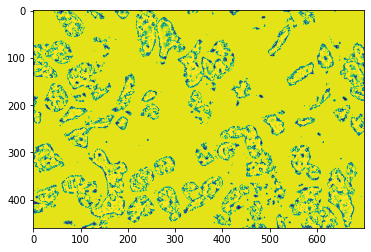

In [ ]:
# TEXTURE FEATURE USING LAB
import cv2
from google.colab.patches import cv2_imshow

class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self, image, eps = 1e-7):
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    # Normalize the histogram
    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

#image = cv2.imread(image_file)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = Mx_train_pre[10]
desc = LocalBinaryPatterns(24, 8)
hist, lbp = desc.describe(gray)
print("Histogram of Local Binary Pattern value: {}".format(hist))

contrast = contrast.flatten()
dissimilarity = dissimilarity.flatten()
homogeneity = homogeneity.flatten()
energy = energy.flatten()
correlation = correlation.flatten()
ASM = ASM.flatten()
hist = hist.flatten()

features = np.concatenate((contrast, dissimilarity, homogeneity, energy, correlation, ASM, hist), axis=0)
#pyplot.imshow(gray)
pyplot.imshow(lbp)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import plotly.figure_factory as ff
images = Mx_train
# Check the distribution of red values 
red_values = []
for i in range(len(images)):
  red_value = np.mean(images[i][:, :, 0])
  red_values.append(red_value)

# Check the distribution of green values 
green_values = []
for i in range(len(images)):
  green_value = np.mean(images[i][:, :, 1])
  green_values.append(green_value)

# Check the distribution of blue values 
blue_values = []
for i in range(len(images)):
  blue_value = np.mean(images[i][:, :, 2])
  blue_values.append(blue_value)
  
# Plotting the histogram
fig = ff.create_distplot([red_values, green_values, blue_values], group_labels=["R", "G", "B"], colors=['red', 'green', 'blue'])
fig.update_layout(showlegend=True, template="simple_white")
fig.update_layout(title_text='Distribution of channel values across images in RGB')
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

## *MORPHOLOGICAL FEATURE*

In [ ]:
# MORPHOLOGICAL FEATURE : AREA, PERIMETER, COMPACTNESS, ASPECT RATIO, CONVEX AREA,SOLIDITY, CANCAVITY, ROUNDNESS

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
#img = cv.imread('star.jpg',0)
img = Mx_train[10]
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgg,127,255,0)
contours, im2 = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print( M )
#Area Property
area = cv2.contourArea(cnt)
print(area)
#Perimeter Property
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

{'m00': 4.0, 'm10': 2442.0, 'm01': 1832.0, 'm20': 1490842.6666666665, 'm11': 1118436.0, 'm02': 839057.0, 'm30': 910161483.0, 'm21': 682805941.3333334, 'm12': 512244298.5, 'm03': 384289022.0, 'mu20': 1.6666666665114462, 'mu11': 0.0, 'mu02': 1.0, 'mu30': 2.384185791015625e-07, 'mu21': 1.1082738637924194e-07, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.10416666665696539, 'nu11': 0.0, 'nu02': 0.0625, 'nu30': 7.450580596923828e-09, 'nu21': 3.4633558243513107e-09, 'nu12': 0.0, 'nu03': 0.0}
4.0
7.656854152679443


NameError: ignored

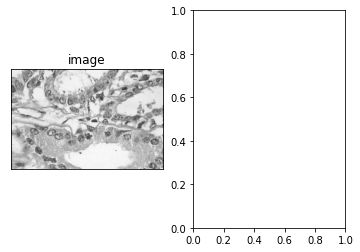

In [ ]:
# https://machinelearningprojects.net/histogram-of-a-grayscale-image/
# TO CREATE HISTOGRAM OF AN IMAGE

import numpy as np
def hist(img):
  imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  # create the histogram
  np.histogram(imgg, bins=10, range=None, normed=None, weights=None, density=None)
  pyplot.subplot(1,2,1)
  pyplot.imshow(imgg,cmap='gray')
  pyplot.title('image')
  pyplot.xticks([])
  pyplot.yticks([])
  pyplot.subplot(1,2,2)
  hist, bin = np.histogram(im1.ravel(),256,[0,255])
  #print(hist, bin)
  pyplot.xlim([0,255])
  pyplot.plot(hist)
  pyplot.title('histogram')
  pyplot.show()

hist(Mx_train[10])

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def binarise(r):
  r = cv2.cvtColor(r, cv2.COLOR_RGB2GRAY)
  print(r.shape)
  a = r[0].min()
  b = r[0].max()
  for i in range(r.shape[0]):
    for j in range(r.shape[1]):
      if r[i][j] == a:
        r[i][j] = 0
      elif r[i][j] == b:
        r[i][j] = 255
  cv2_imshow(r)

# COLOR QUANTIZATION (K=2) using cv2.kmeans()
def color_Quantize(image_spot):
  image_spot_reshaped = image_spot.reshape((image_spot.shape[0] * image_spot.shape[1], 3))

  # convert to np.float32
  Z = np.float32(image_spot_reshaped)
  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((image_spot.shape))
  cv2_imshow(image_spot)
  #cv2_imshow(res2)
  #binarise(res2)

color_Quantize(Bx_train[23])